<a href="https://colab.research.google.com/github/SMKProj/YoutubeDataAnalysis/blob/main/YTVideosAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import warnings
import pandas as pd
from google.colab import files

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
uploaded = files.upload( )

Saving CA_category_id.json to CA_category_id.json
Saving CAvideos.csv to CAvideos.csv
Saving DE_category_id.json to DE_category_id.json
Saving DEvideos.csv to DEvideos.csv
Saving FR_category_id.json to FR_category_id.json
Saving FRvideos.csv to FRvideos.csv
Saving GB_category_id.json to GB_category_id.json
Saving GBvideos.csv to GBvideos.csv
Saving IN_category_id.json to IN_category_id.json
Saving INvideos.csv to INvideos.csv
Saving JP_category_id.json to JP_category_id.json
Saving JPvideos.csv to JPvideos.csv
Saving KR_category_id.json to KR_category_id.json
Saving KRvideos.csv to KRvideos.csv
Saving MX_category_id.json to MX_category_id.json
Saving MXvideos.csv to MXvideos.csv
Saving RU_category_id.json to RU_category_id.json
Saving RUvideos.csv to RUvideos.csv
Saving US_category_id.json to US_category_id.json
Saving USvideos.csv to USvideos.csv


In [11]:
files_csv = [file for file in uploaded if '.csv' in file]
files_json = [file for file in uploaded if '.json' in file]

iso-8859-1 is best encoding when there is collection of data from various countries and regions

**Data Consolidation**

In [12]:
full_df = pd.DataFrame()

for f in files_csv:
  df = pd.read_csv(f, encoding = 'iso-8859-1', error_bad_lines=False)
  full_df = pd.concat([full_df,df], ignore_index=True)

In [13]:
full_df.shape

(375942, 16)

Checking null values in daatframe

In [14]:
full_df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
dtype: int64

In [15]:
len(full_df)

375942

Dropping null values

In [17]:
newdf = full_df.dropna()
len(newdf)

356464

Checking for duplicated data

In [19]:
newdf.duplicated().sum()
newdf[newdf.duplicated()].shape

(34916, 16)

In [20]:
newdf = newdf.drop_duplicates()

**Exporting data to csv and sqlite database**

In [21]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/YouTubeData/'

Mounted at /content/drive


In [22]:
newdf.to_csv(PATH + 'youtubesample.csv',index=False)

In [23]:
newdf.to_json(PATH + 'youtubesample.json')

In [24]:
from sqlalchemy import create_engine
engine = create_engine(r'sqlite:///'+ PATH + '/youtube_sample.sqlite')

In [25]:
newdf.to_sql('Users', con=engine, if_exists='append')

321548

In [26]:
newdf.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...


In [27]:
newdf['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

**Creating dictionary of Category Id with associated Category Name**

In [28]:
json_df = pd.read_json('US_category_id.json')

In [29]:
json_df.head(3)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [31]:
cat_dict = {}

for i in range(0,len(json_df['items'])):
  cat_dict[int(json_df['items'][i]['id'])]=json_df['items'][i]['snippet']['title']

In [32]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [33]:
newdf['category_name'] = newdf['category_id'].map(cat_dict)

In [34]:
newdf.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy


**Which Category has maximum likes?** Music category is found with maximum likes

In [35]:
catWithMaxLikes = newdf.sort_values('likes', ascending=False)
catWithMaxLikes.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
159083,7C2z4GqqS5E,18.01.06,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,Music
158913,7C2z4GqqS5E,18.31.05,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",121219886,5595203,205565,1225326,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,Music
158733,7C2z4GqqS5E,18.30.05,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",115664850,5530568,200995,1213172,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,Music


**Finding top three categories based on likes** It is found that 'Music', 'Entertainment' and 'Non profits & Activisim' categories are the three most liked categories

In [36]:
sort_df = newdf.sort_values('likes', ascending=False).drop_duplicates('category_name', keep='first')
sort_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
159083,7C2z4GqqS5E,18.01.06,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",123010920,5613827,206892,1228655,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MVD...,Music
130634,FlsCjmMhFmw,17.24.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",169884583,3312868,1753274,845233,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
138755,oWjxSkJpxFU,18.05.02,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",26703269,2061275,545595,704824,https://i.ytimg.com/vi/oWjxSkJpxFU/default.jpg,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism


# **Examining percentile distribution of each category using Box plots**

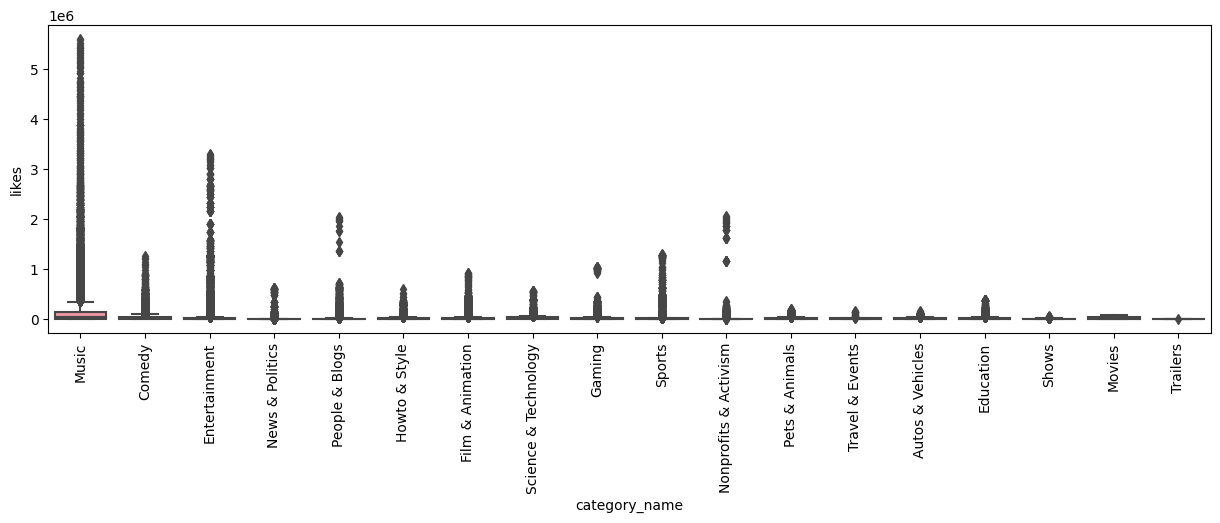

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
sns.boxplot(x='category_name', y='likes', data=newdf)
plt.xticks(rotation='vertical')
plt.show()

Music, Entertainment categories has more data points, which shows that these categories are more popular

# **Examining if audience is engaged or not by computing like_rate, dislike_rate, comment_rate**

In [39]:
newdf['likes_rate'] = (newdf['likes']/newdf['views']) * 100
newdf['dislike_rate'] = (newdf['dislikes'] / newdf['views']) * 100
newdf['comment_rate'] = (newdf['comment_count'] / newdf['views'])*100

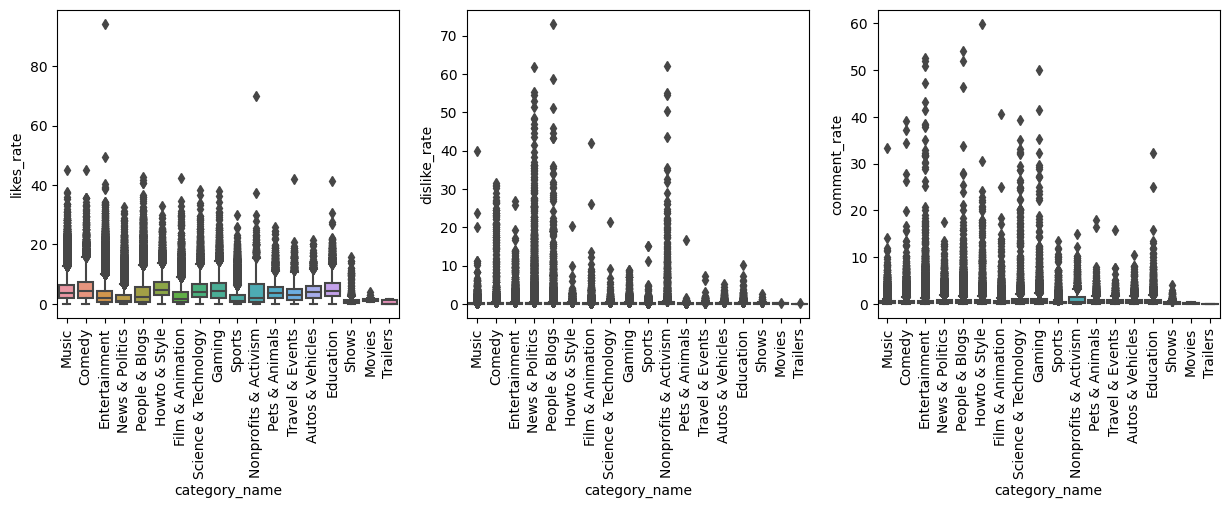

In [40]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x=newdf['category_name'], y=newdf['likes_rate'])
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
sns.boxplot(x=newdf['category_name'], y=newdf['dislike_rate'])
plt.xticks(rotation='vertical')

plt.subplot(1,3,3)
sns.boxplot(x=newdf['category_name'], y=newdf['comment_rate'])
plt.xticks(rotation='vertical')

plt.show()

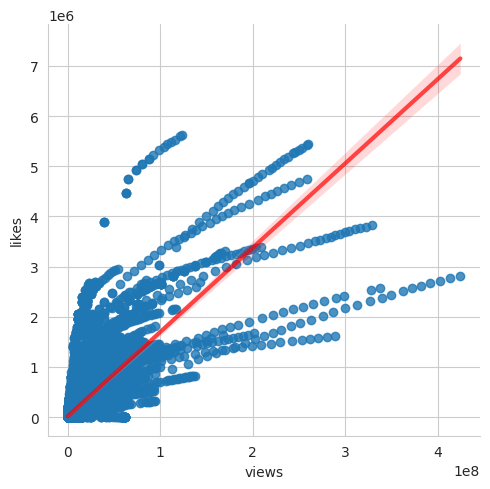

In [75]:
sns.set_style('whitegrid')
sns.lmplot(x = 'views', y = 'likes', data=newdf, line_kws={'color':'r', 'alpha':0.7, 'lw':3})

In [43]:
data_corr = newdf[['views', 'likes','dislikes']].corr()
data_corr

,views,likes,dislikes
views,1.000000,0.779094,0.453198
likes,0.779094,1.000000,0.490833
dislikes,0.453198,0.490833,1.000000


<Axes: >

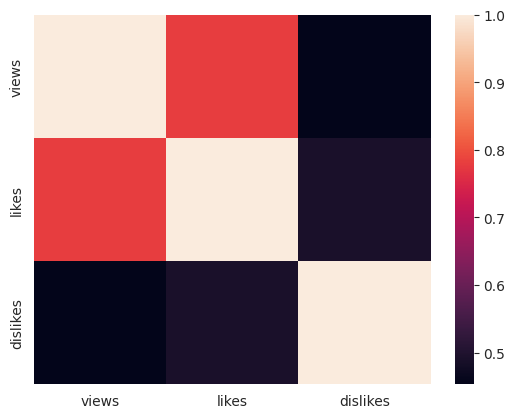

In [44]:
sns.heatmap(data_corr)

**Which channel has largest number of trending videos**

In [45]:
newdf['channel_title'].value_counts()

The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
Benaissa Lamroubal                      1
VOA Farsi                               1
elsykazan                               1
Simon Misalis                           1
Deluxe Rize                             1
Name: channel_title, Length: 34186, dtype: int64

In [46]:
trending_channels = newdf.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [47]:
trending_channels = trending_channels.rename(columns= {0 : 'total_videos'})

In [49]:
import plotly.express as px

px.bar(trending_channels[0:10],x = 'channel_title', y = 'total_videos')


**Does pounctutations in titles and tags has some relation with views?**

In [50]:
import string

In [51]:
def punc_count(text):
  return len([char for char in text if char in string.punctuation])


In [54]:
newdf['punc_count'] = newdf['title'].apply(punc_count)

In [55]:
punc_corr = newdf[['punc_count','views', 'likes','dislikes']].corr()
punc_corr

,punc_count,views,likes,dislikes
punc_count,1.000000,0.043292,0.040858,0.014815
views,0.043292,1.000000,0.779094,0.453198
likes,0.040858,0.779094,1.000000,0.490833
dislikes,0.014815,0.453198,0.490833,1.000000


<Axes: >

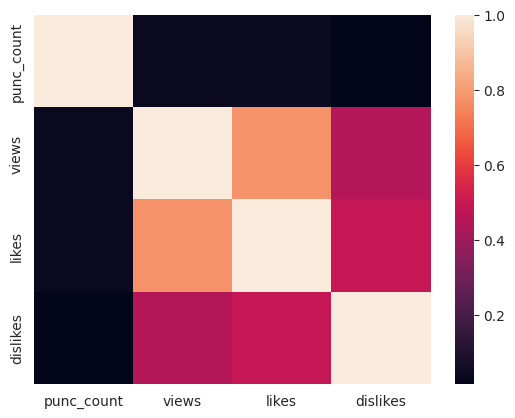

In [56]:
sns.heatmap(punc_corr)

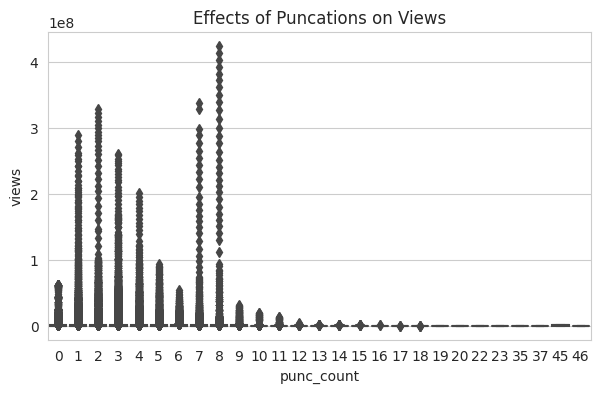

In [65]:
plt.figure(figsize=(7,4))
sns.boxplot(x=newdf['punc_count'], y=newdf['views'])
plt.title('Effects of Puncations on Views')
plt.show()

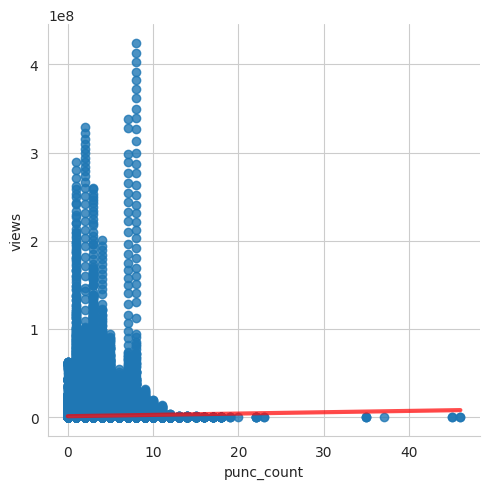

In [78]:
sns.set_style('whitegrid')
sns.lmplot(x = 'punc_count', y = 'views', data=newdf, line_kws={'color':'r', 'alpha':0.7, 'lw':3})

Both boxplots and regression plot finding suggests that more views on videos can be obtained with usage of maximum 8 punctuations in title

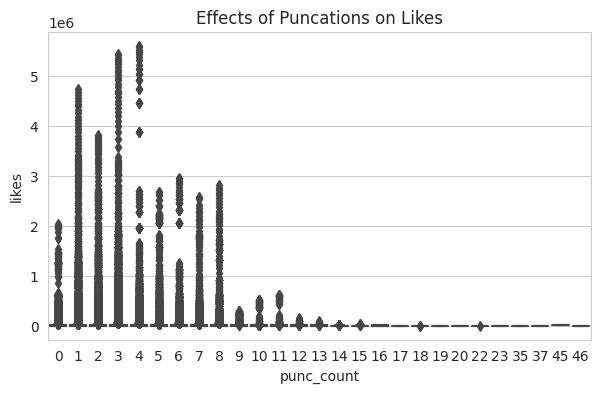

In [63]:
plt.figure(figsize=(7,4))
sns.boxplot(x=newdf['punc_count'], y=newdf['likes'])
plt.title('Effects of Puncations on Likes')
plt.show()

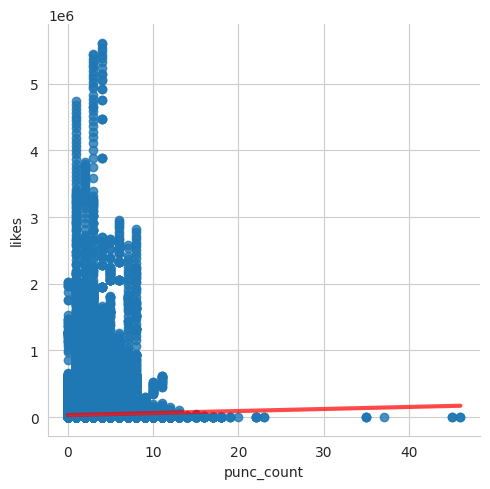

In [77]:
sns.set_style('whitegrid')
sns.lmplot(x = 'punc_count', y = 'likes', data=newdf, line_kws={'color':'r', 'alpha':0.7, 'lw':3})

The box plot and regression plot suggests that lesser the punctuation marks in title more likely the video is going to receive more likes

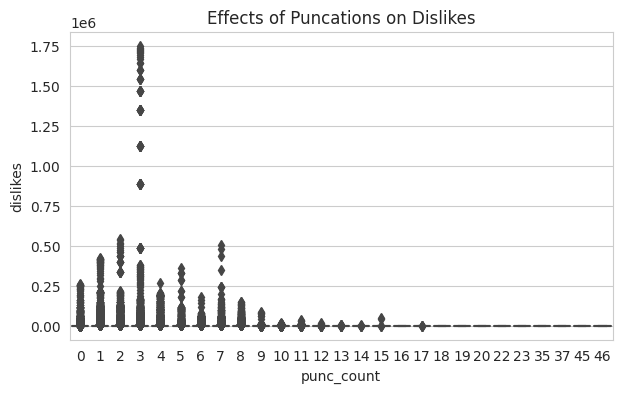

In [64]:
plt.figure(figsize=(7,4))
sns.boxplot(x=newdf['punc_count'], y=newdf['dislikes'])
plt.title('Effects of Puncations on Dislikes')
plt.show()

Dislikes are not much affected with the usage of punctuation marks in title.

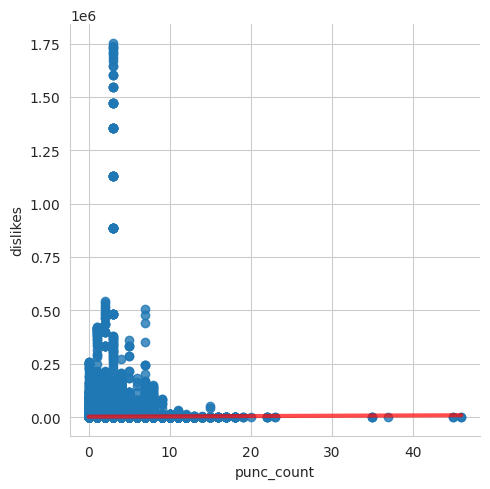

In [76]:
sns.set_style('whitegrid')
sns.lmplot(x = 'punc_count', y = 'dislikes', data=newdf, line_kws={'color':'r', 'alpha':0.7, 'lw':3})

As expected no relation is found between punctutation count & dislikes